In [1]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
plt.style.use('bmh')

# density plotter
def plot_beta_hist(ax, a, b):
    ax.hist(np.random.beta(a, b, size=30000),
            histtype="stepfilled", bins=60, alpha=0.8, density=True)

# The Beta distribution


* The Beta distribution is a family of continuous probability distributions defined on the interval [0, 1], thus it's perfect if you need to model:
** probabilities;
** normalized propensities;
** any random variable limited to intervals of finite length.

* It's parameterized by two positive shape parameters: a, b.
* a and b are NOT interchangeable - see below different cases.

Case a = b => dislocated in the middle of the outcome interval [0, 1] and symmetrical in shape.

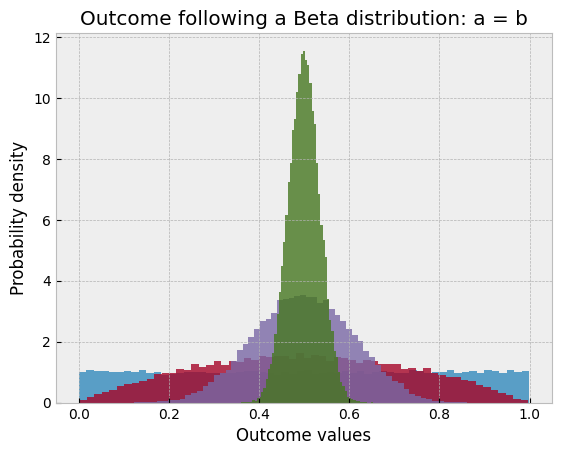

In [2]:
fig, ax = plt.subplots()
plot_beta_hist(ax, 1, 1)
plot_beta_hist(ax, 2, 2)
plot_beta_hist(ax, 10, 10)
plot_beta_hist(ax, 100, 100)
ax.set_title("Outcome following a Beta distribution: a = b")
ax.set_xlabel('Outcome values')
ax.set_ylabel('Probability density')
plt.show()

Case a > b => dislocated to the right and skewed to the right (pls note: as a, b increases, the asymmetry is less visible).

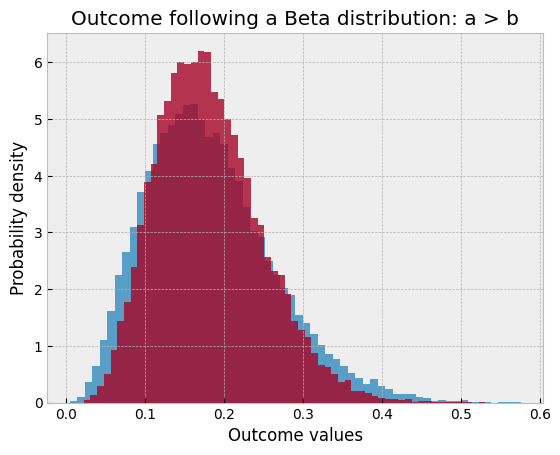

In [3]:
fig, ax = plt.subplots()
plot_beta_hist(ax, 4, 18)
plot_beta_hist(ax, 6, 27)
# plot_beta_hist(ax, 15, 2)
# plot_beta_hist(ax, 30, 10)
# plot_beta_hist(ax, 150, 50)
ax.set_title("Outcome following a Beta distribution: a > b")
ax.set_xlabel('Outcome values')
ax.set_ylabel('Probability density')
plt.show()

Case a < b => dislocated to the left and skewed to the left

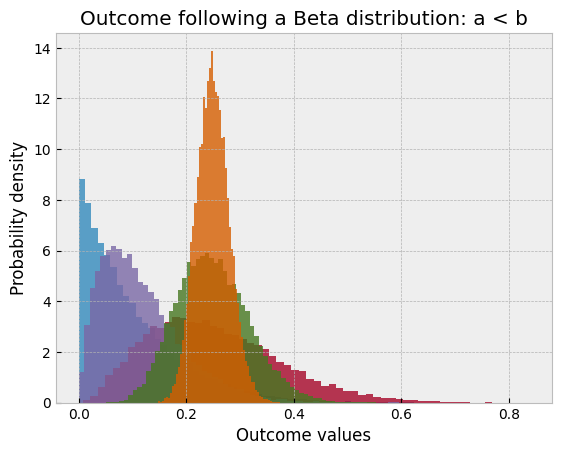

In [4]:
fig, ax = plt.subplots()
plot_beta_hist(ax, 1, 9)
plot_beta_hist(ax, 3, 9)
plot_beta_hist(ax, 2, 15)
plot_beta_hist(ax, 10, 30)
plot_beta_hist(ax, 50, 150)
ax.set_title("Outcome following a Beta distribution: a < b")
ax.set_xlabel('Outcome values')
ax.set_ylabel('Probability density')
plt.show()

# Estimating the probability distribution of a probability (sic)
## Business case
* In the past we sent a special newsletter (containing a new call to action) to the customer base of N = 500 customers.
* 100 people opened and positively reacted to the call to action.
* We know the average result that is, sample_mean = 100/500 = 0.20 = 20%, but we want a probability estimate that takes uncertainty into account.
* We can use the Beta distribution and the method of moments in order to estimate its parameters.

## Method of moments
It was first developed by Karl Pearson (a legend). This guy considered that good estimates of the parameters of a probability distribution are those for which moments (e.g. mean, variance, skewness, kurtosis, etc) of the probability density function are equal to the corresponding moments of the sample data.
So, if you have a set of observations {X(1), X(2),...}, a probability density function, for example a Beta distribution, you
* take the sample moments - which are numbers, computed using {X(1), X(2),...}, so they are functions of sample data;
* set them equal to the theoretical moments, which are functions of the parameters of the distribution, i.e. a and b for  a Beta(a, b), forming a set of equations, such as theoretical mean = sample mean, or theoretical variance = sample variance, or else...

solve this set of equations and get the parameters.

## Our case
For a Beta distribution we have:
* theoretical mean = a/(a+b)
* a+b = N (additional requirements in sample estimation: sample size N = a+b)
* N = 500
* sample mean = 0.20

So we can solve for a, b, getting:

In [5]:
# solve the system for a, b
N = 500
sample_mean = 0.2
a = N*sample_mean
b = N - a
print("a:", a, "b:", b)

a: 100.0 b: 400.0


Let's plot the Beta distribution:

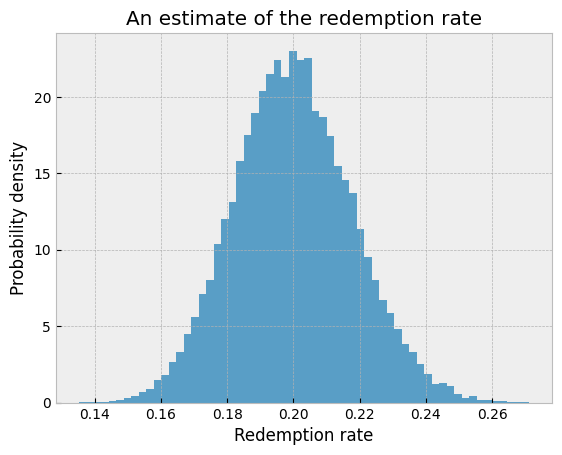

In [6]:
fig, ax = plt.subplots()
plot_beta_hist(ax, a, b)
ax.set_title("An estimate of the redemption rate")
ax.set_xlabel('Redemption rate')
ax.set_ylabel('Probability density')
plt.show()

# The Bayesian Beta Binomial model
For an overview of the model see https://compcogsci-3016.djnavarro.net/technote_betabinomial.pdf,  and/or https://www.bayesrulesbook.com/chapter-3.html, and also http://www.obscureanalytics.com/2012/07/04/to-the-basics-bayesian-inference-on-a-binomial-proportion/.

On Bayesian Statistics see: https://www.stat.cmu.edu/~brian/463-663/week09/Chapter%2003.pdf. Or, this online (free) book: https://www.bayesrulesbook.com/

## Business case: learning from data over time
* We want to better assess the probability of success of our special content, a monthly newsletter with a specific structure aimed at stimulating the purchase of a service.
* Last month we did a first sending of the newsletter, and estimated the probability density function of the redemption rate (see former example).
* Now we did it again, on 200 different customers.
* 25 users gave a positive response, so the sample mean is 25/200 = 0.125 = 12.5%.
* applying the method of moments we get a2 = 25, b2 = 175.
* We want to combine new and old information in a meaningful way, using a Bayesian model.

## Prior
It's the old estimate, represented by a Beta(a1=100, b1=400), with N1=500.
## Likelihood
It's the new piece of information, represented by a Beta(a2=25, b2=175), with N2=200.
## Posterior
It combines old and new information in order to have an updated estimate.
The posterior is equal to:
Beta(a1=100, b1=400)*Beta(a2=25, b2=175) = Beta(a1+a2, b1+b2) = Beta(125, 575).

Let's plot them.

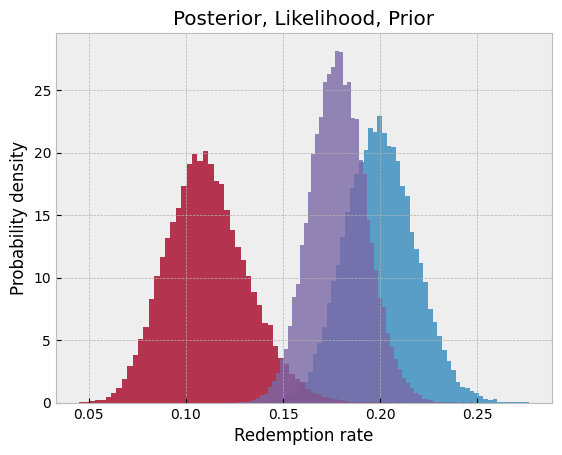

In [7]:
fig, ax = plt.subplots()
plot_beta_hist(ax, 100, 400)
plot_beta_hist(ax, 25, 200)
plot_beta_hist(ax, 125, 575)
ax.set_title("Posterior, Likelihood, Prior")
ax.set_xlabel('Redemption rate')
ax.set_ylabel('Probability density')
plt.show()

## Business case 2: using a Bayesian model to combine different pieces of information
### The ESG propensity case
* We have two sources.
** a reliable survey that tells us that the propensity of Italians to ESG investments is 0.60 = 60%;
** an estimate made on the basis of a sentiment analysis carried out on Twitter which tells us that the average propensity of Italians to ESG investments is 0.35 = 35%.

* We want to combine them.

Idea: to associate to each of the two sources, which identifies a propensity defined in [0, 1], a Beta distribution.
So we need a1, b1, a2, b2.
# How to do it
* Use a variation of the method of moments, using modes instead of means.
* Set mode1  = (a1-1)/(a1+b1-2) = 0.60.
* Set mode2 = (a2-1)/(a2+b2-2) = 0.35.
* So far the system is underdetermined - if we knew the variance (sometimes surveys have an associated Standard Error = S.E.), we could use it, but we don't know it
* we have to use N1 and N2: they are the "sample equivalents" = information associated with that source. For comparable sample surveys, just take the number of subjects. In this case we have to evaluate the quality of the information from the two sources, in a rather qualitative way.
* Hence, we set N1 + N2 = N such that the breadth of the distribution is reasonable, say N = 15.
* Then we decide the relative weight of the information from the two sources - let's say that we consider the survey more reliable, say N2 = 2/3*N1, so the second source is equivalent to a smaller sample.
* We solve the system:
  - (a1-1)/(a1+b1-2) = 0.60
  - (a2-1)/(a2+b2-2) = 0.35
  - N2 = 2/3*N1
  - N1 + N2 = 15
  - a1 + b1 = N1
  - a2 + b2 = N2
and we get a1 = 5.2, b1 = 3.8, a2 = 2.4, b2 = 3.6.

In [8]:
# solve the system
N1 = 9
N2 = 6
b1 = N1 -1 - 0.6*(N1-2)
a1 = N1 - b1
b2 = N2 -1 - 0.35*(N2-2)
a2 = N2 - b2

print("a1:",a1,"b1:",b1, "a2:",a2, "b2:",b2)

a1: 5.2 b1: 3.8 a2: 2.4 b2: 3.6


### Prior
Survey: Beta(a1, b1)
### Likelihood
Sentiment data: Beta(a2, b2)
### Posterior
Posterior = prior*likelihood: Beta(a1+a2, b1+b2)

Let's plot them. Pls note: the posterior mode is not a linear combination of the prior mode and the likelihood mode.

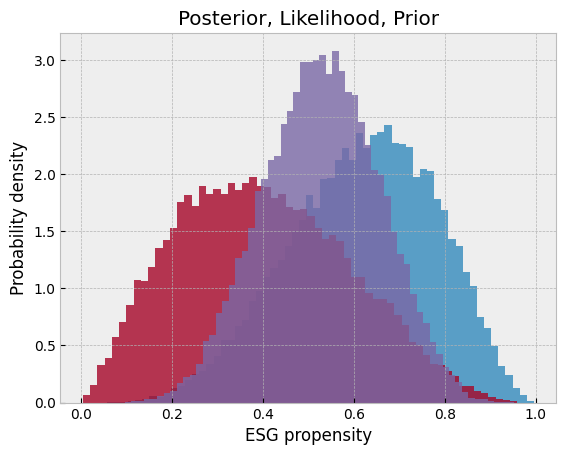

In [9]:
fig, ax = plt.subplots()
plot_beta_hist(ax, 5.2, 3.2)
plot_beta_hist(ax, 2.4, 3.6)
plot_beta_hist(ax, 5.2  +2.4, 3.2 + 3.6)
ax.set_title("Posterior, Likelihood, Prior")
ax.set_xlabel('ESG propensity')
ax.set_ylabel('Probability density')
plt.show()

## Business case 3: using a Bayesian model for continuous learning
### Content preferences learning
* We have different type of contents - they differ in behavioral terms - we have "storytelling", "peer comparison", etc.
* We want to learn which one is best for each "marketing personas" = cluster of customers.
* "Best":= higher redemption rate = CTR = Click-through rate = (#users who click on a specific link)/(#users).
* Thus, for each marketing personas and each type of content we estimate on a continuous basis a CTR.
* For the sake of simplicity, let's focus on a specific personas, say "Young urban women" and a specific tupe of content, say "Storytelling".
* We start with no idea = flat prior = Beta(1,1)
* As the data arrives we revise the estimate = Bayesian update:
** if the user clicks, then Success = 1, otherwhise Success = 0
** if the user doesn't click Failure = 1, otherwise Failure = 0, ie Failure = 1 - Success
** we have a' = a + Success, b' = b + Failure.
* At a given moment, the optimal policy is to choose, for each marketing personas, the content with the highest probability of conversion

Let's see how it works.

## t = 0
Just the prior = no idea, CTR might be anything in [0, 1]...

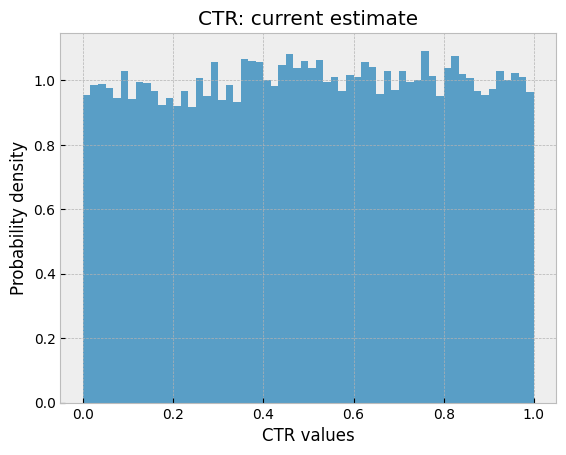

In [10]:
a = 1
b = 1

fig, ax = plt.subplots()
plot_beta_hist(ax, a, b)
ax.set_title("CTR: current estimate")
ax.set_xlabel('CTR values')
ax.set_ylabel('Probability density')
plt.show()

## t = 1, first user
The user clicks, so Success = 1 and Failure = 1- Success = 0, and we update the parameters following the rule a' = a + Success, b' = b + Failure

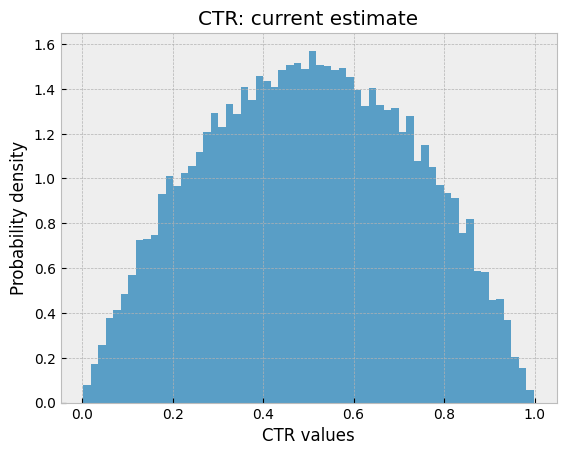

In [11]:
Success = 1
Failure = 1 - Success
a = a + Success
b = a + Failure

fig, ax = plt.subplots()
plot_beta_hist(ax, a, b)
ax.set_title("CTR: current estimate")
ax.set_xlabel('CTR values')
ax.set_ylabel('Probability density')
plt.show()

## t = 2, second user
The user doesn't click, so Success = 0 and Failure = 1 - Success = 1, and we update the parameters following the rule a' = a + Success, b' = b + Failure

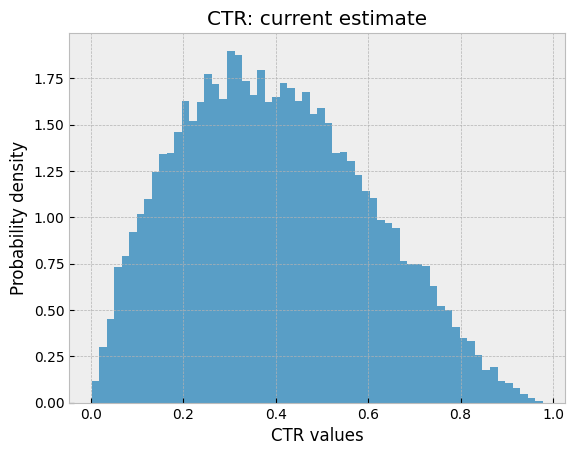

In [12]:
Success = 0
Failure = 1 - Success
a = a + Success
b = a + Failure

fig, ax = plt.subplots()
plot_beta_hist(ax, a, b)
ax.set_title("CTR: current estimate")
ax.set_xlabel('CTR values')
ax.set_ylabel('Probability density')
plt.show()

## t = 3, third user
The user doesn't click, so Success = 0 and Failure = 1 - Success = 1, and we update the parameters following the rule a' = a + Success, b' = b + Failure

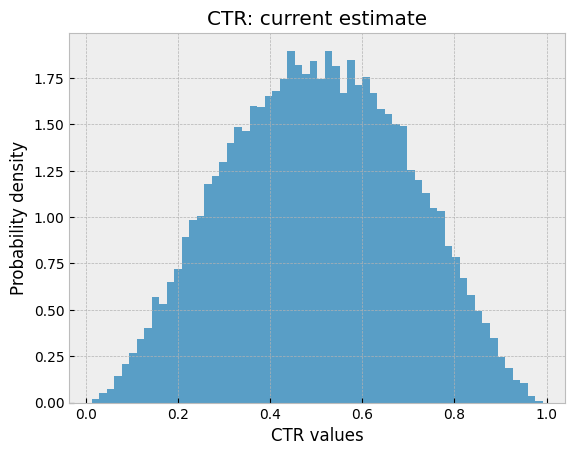

In [13]:
Success = 1
Failure = 1 - Success
a = a + Success
b = a + Failure

fig, ax = plt.subplots()
plot_beta_hist(ax, a, b)
ax.set_title("CTR: current estimate")
ax.set_xlabel('CTR values')
ax.set_ylabel('Probability density')
plt.show()


## t = 4, a bunch of 10 users
We collect sum(Success) = 2 and sum(Failure) = 1 - sum(Success) = 8, and we update the parameters following the rule a' = a + sum(Success), b' = b + sum(Failure)

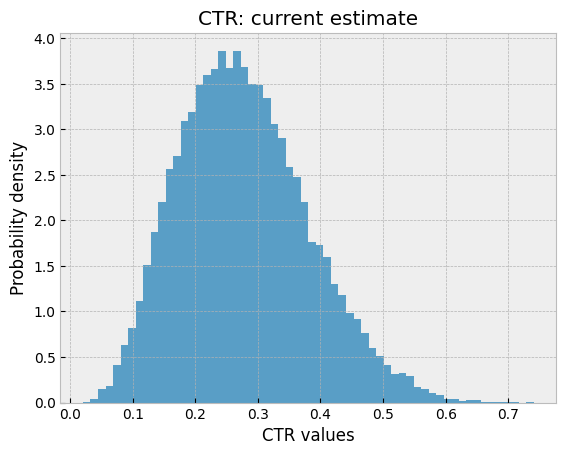

In [14]:
Success = np.array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0])
Failure = 1 - Success
a = a + np.sum(Success)
b = a + np.sum(Failure)

fig, ax = plt.subplots()
plot_beta_hist(ax, a, b)
ax.set_title("CTR: current estimate")
ax.set_xlabel('CTR values')
ax.set_ylabel('Probability density')
plt.show()